# Proyecto: Análisis de mercado inmobiliario

¡Bienvenido/a al primer proyecto de la carrera de Data Science de Acamica! 

El objetivo de este proyecto es reproducir los pasos que haría un/a Data Scientist cuando se enfrenta a una problemática real. Por eso, consta de tres secciones:
* En la Parte 1, te presentamos la problemática sobre la cual vas a trabajar. En esta sección deberás decidir qué datos te ayudarán a trabajar en este problema y dónde puedes conseguirlos.
* En la Parte 2 te proveemos de un dataset para abordar la problemática planteada. Deberás realizar un Análisis Exploratorio de Datos sobre este dataset.
* En la Parte 3, deberás utilizar herramientas de Machine Learning para predecir la variable de interés.


En este proyecto vas a trabajar con un dataset de propiedades en venta publicado en el portal [Properati](www.properati.com.ar).

## Problema

Recientemente te has incorporado al equipo de Datos de una gran inmobiliaria. La primera tarea que se te asigna es ayudar a los tasadores/as a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo. Para ello, propones crear un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.

### 1. Pensando como un/a Data Scientist

Responde la siguientes pregunta:
1. ¿Qué datos crees que te ayudarían a trabajar en el problema?¿Por qué?

**Importante**: NO deberás buscar esos datos, solamente justificar qué información crees que te ayudaría a resolver la problemática planteada.

Los datos que nos podrían ayudar a valuar las propiedades podrían ser: 
* La ubicación de la propiedad (existen zonas de la ciudad que son más caras).
* La superficie que ocupa la propiedad, tanto terreno total como superficie construida.
* El tipo de propiedad que es (terreno, casa, departamento, terreno rústico, terreno urbano).
* Características con las que cuenta la casa (número de habitaciones, baños, zonas comúnes, etc).

Estos datos nos podrían ayudar ya que dependiendo de estos datos se puede saber el valor de una propiedad, estas características le dan valor a la misma y dependen de ellas para saber en cuanto se pueden vender.

Los datos que nos podrían ayudar a valuar las propiedades podrían ser: 
* La ubicación de la propiedad (existen zonas de la ciudad que son más caras).
* La superficie que ocupa la propiedad, tanto terreno total como superficie construida.
* El tipo de propiedad que es (terreno, casa, departamento, terreno rústico, terreno urbano).
* Características con las que cuenta la casa (número de habitaciones, baños, zonas comúnes, etc).

Estos datos nos podrían ayudar ya que dependiendo de estos datos se puede saber el valor de una propiedad, estas características le dan valor a la misma y dependen de ellas para saber en cuanto se pueden vender.

### 2. Análisis Exploratorio de Datos

En esta sección, debes realizar un Análisis Exploratorio de Datos sobre el dataset de propiedades de Properati. Es importante que respondas las siguientes preguntas durante el análisis:

* ¿Qué tamaño tiene el dataset?¿Cuántas instancias y cuántas columnas?
* ¿Cuántos valores faltantes hay en cada columna?
* ¿Cómo es la distribución de cada variable? Deberás hacer histogramas para las variables numéricas y gráficos de barras para las variables categóricas.
* ¿Cómo se relacionan las variables entre sí?¿Qué tipo de gráfico será conveniente para presentar esta información?
* ¿Cómo están correlacionadas las variables numéricas?¿Qué tipo de gráfico será conveniente para presentar esta información?¿Cuáles serán los mejores predictores de la variable de interés?

Vas a encontrar instrucciones para responder estas preguntas. Es importante aclarar que estas instrucciones corresponden al **mínimo entregable** que esperamos en la consigna.

**Comentarios sobre el dataset** 
1. Nosotros ya hicimos un *curado* sobre el dataset que puedes descargar directamente de la página de Properati. Muchos de los pasos que hicimos para curar el conjunto de datos los veremos durante el Bloque 2 de la carrera.

2. Si tienes dudas sobre qué representa alguna de las columnas, puedes consultar [aquí](https://www.properati.com.ar/data/). Notarás que algunas columnas fueron descartadas.

3. `Capital Federal` refiere a la Ciudad de Buenos Aires. `Bs.As. G.B.A. Zona Norte`, `Bs.As. G.B.A. Zona Sur` y `Bs.As. G.B.A. Zona Oeste` son regiones que conforman el [Gran Buenos Aires](https://es.wikipedia.org/wiki/Gran_Buenos_Aires), un conjunto de ciudades que rodean a la Ciudad de Buenos Aires.


#### 2.1 Desafío
En el dataset provisto hay mucha información, más allá del problema planteado. Propone una pregunta que pueda ser respondida por el dataset e intenta responderla.¿Cuáles son los sesgos de la respuesta obtenida?(¿Cuán generalizable es la respuesta obtenida?)¿Necesitas información complementaria?¿Cómo la obtendrías?

Por ejemplo: ¿Cuál es el barrio más caro de Buenos Aires? Probablemente puedas responder esta pregunta con este dataset. Pero podria ocurrir que la respuesta esté sesgada. ¿Cómo? Tal vez las propiedades más caras no se publican de forma online, sino que utilizan otro canal de venta.

0. Importa las librerías necesarias para trabajar en la consigna.

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data_properati = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')
data_properati.shape # Número de filas y columnas

(146660, 19)

1. Carga el dataset usando las funcionalidades de Pandas. Imprimir cuántas filas y columnas tiene, y sus cinco primeras instancias.

In [4]:
data_properati.head() # Cinco primeras instancias

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


2. **Valores Faltantes**: imprime en pantalla los nombres de las columnas y cuántos valores faltantes hay por columna.

In [5]:
data_properati.columns[0:20] # Nombres de las columnas

Index(['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3',
       'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'price', 'currency', 'title', 'description', 'property_type',
       'operation_type'],
      dtype='object')

In [6]:
data_properati.isna().sum() # Valores faltantes por columna

start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64

3. **Tipos de propiedad**: ¿Cuántos tipos de propiedad hay publicados según este dataset?¿Cuántos instancias por cada tipo de propiedad hay en el dataset? Responde esta pregunta usando las funcionalidad de Pandas y con un gráfico apropiado de Seaborn. **Pistas**: Te puede ser útil googlear cómo rotar las etiquetas del eje x.

In [7]:
data_tipos_propiedad = data_properati['property_type'].to_list()
data_tipos_propiedad_1 = list(dict.fromkeys(data_tipos_propiedad))
print('Tipos de propiedad:',data_tipos_propiedad_1)
print('Número de tipos de propiedad: ', len(data_tipos_propiedad_1))

Tipos de propiedad: ['Departamento', 'PH', 'Casa', 'Lote', 'Casa de campo', 'Oficina', 'Otro', 'Local comercial', 'Cochera', 'Depósito']
Número de tipos de propiedad:  10


In [8]:
import pandas as pd
df = data_properati['property_type'].value_counts()
print(df)

Departamento       107326
Casa                21521
PH                  14298
Lote                 1312
Oficina               658
Otro                  374
Local comercial       325
Casa de campo         322
Depósito              265
Cochera               259
Name: property_type, dtype: int64


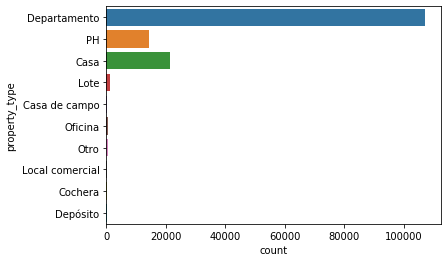

In [9]:
sns.countplot(data = data_properati, y = 'property_type')

Se puede observar como el tipo de propiedad que más hay en el dataset es la instancia Departamento, seguido por Penthouse y en tercer lugar Casa. Los demás tipos de propiedades conforman sólo una pequeña fracción en comparación con los primeros tres tipos de propiedades que más abundan.

4. ¿De qué regiones son las publicaciones? Haz gráficos de barras para las variables `l2` y `l3`. Si te animas, puedes hacer los dos gráficos usando `subplot` de Matplotlib. Dale un tamaño apropiado a la figura para que ambos gráficos se visualicen correctamente.

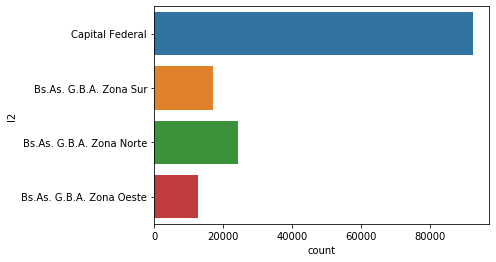

In [10]:
sns.countplot(data=data_properati, y= 'l2')

Se observa que en la región de Capital Federal es donde más propiedades hay con un valor superior a 80000, mientras que la segunda región en donde hay más propiedades es Bs.As. G.B.A. Zona Norte

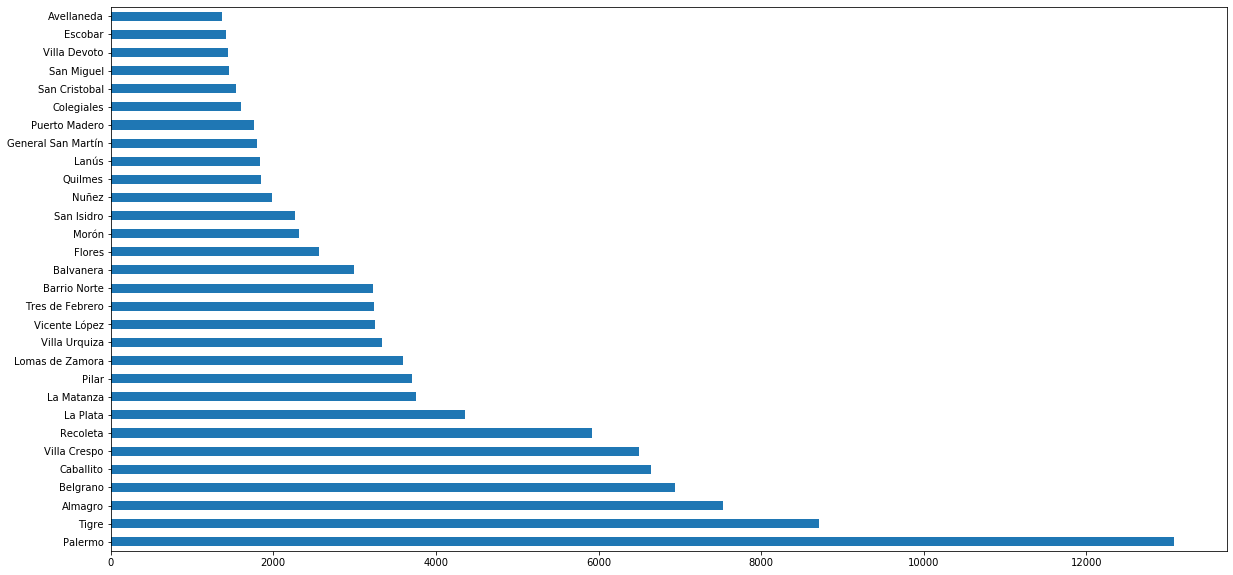

In [11]:
data_properati['l3'].value_counts().head(30).plot(kind='barh', figsize = (20,10))

En el gráfico se observa que la ciudad que tiene más propiedades es la ciudad de Palermo con un valor de más de 12000, seguido de la ciudad Tigre y Almagro

5. **Filtrando el Dataset:** A partir de los resultados del punto 3. y 4., selecciona las tres clases más abundantes de tipos de propiedad y la región con más propiedades publicadas. Crea un nuevo Data Frame con aquellas instancias que cumplen con esas condiciones e imprime su `shape`.

In [12]:
data_properati_nuevo = data_properati[data_properati.l2 == 'Capital Federal']
data_properati_nuevo_1 = data_properati_nuevo[data_properati_nuevo['property_type'] != 'Lote']
data_properati_nuevo_2 = data_properati_nuevo_1[data_properati_nuevo_1['property_type'] != 'Casa de campo']
data_properati_nuevo_3 = data_properati_nuevo_2[data_properati_nuevo_2['property_type'] != 'Oficina']
data_properati_nuevo_4 = data_properati_nuevo_3[data_properati_nuevo_3['property_type'] != 'Otro']
data_properati_nuevo_5 = data_properati_nuevo_4[data_properati_nuevo_4['property_type'] != 'Local comercial']
data_properati_nuevo_6 = data_properati_nuevo_5[data_properati_nuevo_5['property_type'] != 'Cochera']
data_properati_final = data_properati_nuevo_6[data_properati_nuevo_6['property_type'] != 'Depósito']
data_properati_final.shape


(91485, 19)

**Checkpoint:** deberías tener un dataset con 91485 instacias, 19 columnas.

6. **Distribuciones y relaciones de a pares:** Estudia la distribución y las relaciones de a pares de las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price` para cada tipo de propiedad. Para ello, ten en cuenta:
    1. Obtiene estadísticos que te sirvan para tener una primera idea de los valores que abarcan estas variables. ¿Cuáles crees que toman valores que tal vez no tengan mucho sentido?
    1. Algunas instancias tienen valores de superficie (`surface_total`) muy grandes y dificultan la correcta visualización. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Lo mismo ocurre con valores de superficie total muy chico.
    1. Las propiedades no pueden tener `surface_covered` mayor a `surface_total`. Si eso sucede, debes filtrar esas instancias.
    1. El rango de precios que toman las propiedades es muy amplio. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Una vez filtrado el dataset, puedes utilizar la función `pairplot` de Seaborn.

# Parte A Proyecto 2

# Filtrado Departamento

1.- Imputación de valores faltantes en variables surface_total y price en Departamentos

In [13]:
data_properati_final

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
5,2019-10-17,2019-11-01,2019-10-17,-34.593779,-58.441239,Argentina,Capital Federal,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Excelente ph solo 2 unidades, no paga expensas...",PH,Venta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146554,2019-07-31,2019-08-14,2019-07-31,-34.585355,-58.427194,Argentina,Capital Federal,Palermo,4.0,3.0,3.0,175.0,111.0,570000.0,USD,Soler 4900 - PH 4 Ambientes 100% Reciclado- Pa...,Espectacular Ph 4 Ambientes de excelente calid...,PH,Venta
146555,2019-07-31,2019-08-14,2019-07-31,-34.585355,-58.427194,Argentina,Capital Federal,Palermo,3.0,2.0,2.0,144.0,134.0,480000.0,USD,PH Reciclado a nuevo en pleno Palermo Hollywood!,Espectacular Ph 3 Ambientes de excelente calid...,PH,Venta
146556,2019-07-31,2020-01-17,2019-07-31,-34.584134,-58.436389,Argentina,Capital Federal,Palermo,4.0,2.0,2.0,317.0,143.0,530000.0,USD,Hermoso PH reciclado - 4 ambientes + Pileta + ...,"Hermoso PH reciclado en Palermo, 143 m2 cubier...",PH,Venta
146557,2019-07-31,2019-08-23,2019-07-31,-34.583995,-58.417645,Argentina,Capital Federal,Palermo,3.0,2.0,2.0,145.0,145.0,420000.0,USD,Venta. Departamento. 3 Ambientes. 145m². Ampli...,CARACTERÍSTICAS- Ambientes: 3.- Superficie tot...,Departamento,Venta


In [14]:
data_properati_departamento = data_properati_final[data_properati_final['property_type'] == 'Departamento']
data_properati_departamento = data_properati_departamento[data_properati_departamento.surface_covered <= data_properati_departamento.surface_total]
data_properati_departamento.shape


(69628, 19)

In [15]:
data_properati_departamento.surface_total.fillna(data_properati_departamento.surface_total.mean(),inplace = True)
data_properati_departamento.surface_covered.fillna(data_properati_departamento.surface_covered.mean(),inplace = True)
data_properati_departamento.bathrooms.fillna(data_properati_departamento.bathrooms.mean(),inplace = True)
data_properati_departamento.isna().sum()

start_date            0
end_date              0
created_on            0
lat                3986
lon                3986
l1                    0
l2                    0
l3                    0
rooms                 0
bedrooms              0
bathrooms             0
surface_total         0
surface_covered       0
price                 0
currency              0
title                 0
description           0
property_type         0
operation_type        0
dtype: int64

2.- Detección y eliminación de outliers en variables surface_total y price

In [16]:
# Variable surface_total
q25,q75 = np.percentile(data_properati_departamento.surface_total.values, [25,75])
iqr = q75 - q25
minimo = q25 - 1.5*iqr
maximo = q75 + 1.5*iqr
print(q25,q75,iqr, minimo, maximo)

48.0 99.0 51.0 -28.5 175.5


In [17]:
# Variable price
q25,q75 = np.percentile(data_properati_departamento.price.values, [25,75])
iqr = q75 - q25
minimo = q25 - 1.5*iqr
maximo = q75 + 1.5*iqr
print(q25,q75,iqr, minimo, maximo)

120000.0 275000.0 155000.0 -112500.0 507500.0


In [18]:
data_properati_departamento= data_properati_departamento[(data_properati_departamento.surface_total <= 175.5) & (data_properati_departamento.price <= 507500)]
data_properati_departamento.shape

(61781, 19)

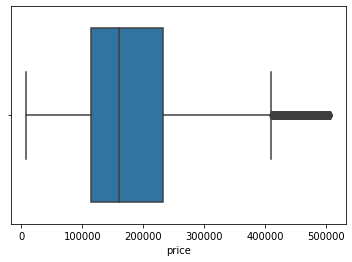

In [19]:
sns.boxplot(data_properati_departamento.price)

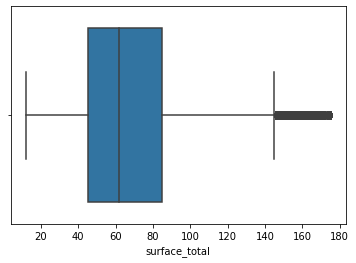

In [20]:
sns.boxplot(data_properati_departamento.surface_total)

3.- Escalado de datos para variables surface_covered, surface_total, bathrooms, bedrooms y rooms

In [21]:
valor_medio = data_properati_departamento.surface_covered.mean()
std = data_properati_departamento.surface_covered.std()
data_properati_departamento['surface_covered_resc'] = (data_properati_departamento.surface_covered- valor_medio)/std

In [22]:
valor_medio = data_properati_departamento.surface_total.mean()
std = data_properati_departamento.surface_total.std()
data_properati_departamento['surface_total_resc'] = (data_properati_departamento.surface_total- valor_medio)/std

In [23]:
valor_medio = data_properati_departamento.bathrooms.mean()
std = data_properati_departamento.bathrooms.std()
data_properati_departamento['bathrooms_resc'] = (data_properati_departamento.bathrooms- valor_medio)/std

In [24]:
valor_medio = data_properati_departamento.rooms.mean()
std = data_properati_departamento.rooms.std()
data_properati_departamento['rooms_resc'] = (data_properati_departamento.rooms- valor_medio)/std

In [25]:
valor_medio = data_properati_departamento.bedrooms.mean()
std = data_properati_departamento.bedrooms.std()
data_properati_departamento['bedrooms_resc'] = (data_properati_departamento.bedrooms- valor_medio)/std

In [26]:
data_properati_departamento.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,...,currency,title,description,property_type,operation_type,surface_covered_resc,surface_total_resc,bathrooms_resc,rooms_resc,bedrooms_resc
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,...,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta,2.868484,2.307452,1.047478,4.381575,6.363010
11,2019-10-17,2019-10-26,2019-10-17,-34.603683,-58.381557,Argentina,Capital Federal,Boedo,2.0,1.0,...,USD,Venta Departamento en Boedo Capital Federal Ga...,"Departamento en Venta, 2 ambientes espectacula...",Departamento,Venta,-0.104916,-0.029417,-0.581635,-0.660503,-0.879688
12,2019-10-17,2019-12-19,2019-10-17,-34.630349,-58.417223,Argentina,Capital Federal,Boedo,2.0,1.0,...,USD,Departamento dos ambientes tipo duplex - Venta...,"Amplio dos ambientes en duplex, 7 años de anti...",Departamento,Venta,-0.655546,-0.613635,-0.581635,-0.660503,-0.879688
20,2019-10-17,2019-10-24,2019-10-17,-34.608246,-58.444262,Argentina,Capital Federal,Abasto,2.0,1.0,...,USD,Departamento de 2 ambientes en Venta en Abasto,"Lindo monoambiente duplex, 31 m2, living-comed...",Departamento,Venta,-1.132758,-1.230309,-0.581635,-0.660503,-0.879688
21,2019-10-17,2019-10-28,2019-10-17,-34.603890,-58.410998,Argentina,Capital Federal,Abasto,1.0,1.0,...,USD,Monoambiente Vista Abierta,Excelente Inversion o 1era vivienda en renovad...,Departamento,Venta,-1.463136,-1.522417,-0.581635,-1.668919,-0.879688


# Filtrado de casa

1.- Imputación de valores faltantes en variables surface_total y price en Casa

In [27]:
data_properati_casa = data_properati_final[data_properati_final['property_type'] == 'Casa']
data_properati_casa = data_properati_casa[data_properati_casa.surface_covered <= data_properati_casa.surface_total]
data_properati_casa.shape

(2036, 19)

In [28]:
data_properati_casa.surface_total.fillna(data_properati_casa.surface_total.mean(),inplace = True)
data_properati_casa.surface_covered.fillna(data_properati_casa.surface_covered.mean(),inplace = True)
data_properati_casa.bathrooms.fillna(data_properati_casa.bathrooms.mean(),inplace = True)
data_properati_casa.isna().sum()

start_date          0
end_date            0
created_on          0
lat                35
lon                35
l1                  0
l2                  0
l3                  0
rooms               0
bedrooms            0
bathrooms           0
surface_total       0
surface_covered     0
price               0
currency            0
title               0
description         0
property_type       0
operation_type      0
dtype: int64

2.- Detección y eliminación de outliers

In [29]:
# Variable surface_total
q25,q75 = np.percentile(data_properati_casa.surface_total.values, [25,75])
iqr = q75 - q25
minimo = q25 - 1.5*iqr
maximo = q75 + 1.5*iqr
print(q25,q75,iqr, minimo, maximo)

168.0 338.5 170.5 -87.75 594.25


In [30]:
# Variable price
q25,q75 = np.percentile(data_properati_casa.price.values, [25,75])
iqr = q75 - q25
minimo = q25 - 1.5*iqr
maximo = q75 + 1.5*iqr
print(q25,q75,iqr, minimo, maximo)

240000.0 480000.0 240000.0 -120000.0 840000.0


In [31]:
data_properati_casa = data_properati_casa[(data_properati_casa.surface_total <= 594.25) & (data_properati_casa.price <= 840000)]
data_properati_casa.shape

(1888, 19)

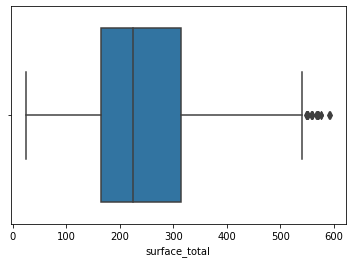

In [32]:
sns.boxplot(data_properati_casa.surface_total)

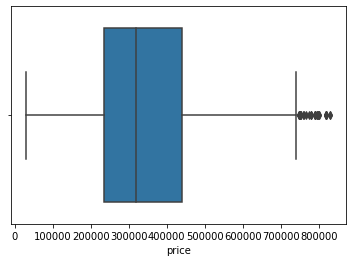

In [33]:
sns.boxplot(data_properati_casa.price)

3.- Escalado de datos para variables surface_covered, surface_total, bathrooms, bedrooms y rooms

In [34]:
valor_medio = data_properati_casa.surface_covered.mean()
std = data_properati_casa.surface_covered.std()
data_properati_casa['surface_covered_resc'] = (data_properati_casa.surface_covered- valor_medio)/std

In [35]:
valor_medio = data_properati_casa.surface_total.mean()
std = data_properati_casa.surface_total.std()
data_properati_casa['surface_total_resc'] = (data_properati_casa.surface_total- valor_medio)/std

In [36]:
valor_medio = data_properati_casa.bathrooms.mean()
std = data_properati_casa.bathrooms.std()
data_properati_casa['bathrooms_resc'] = (data_properati_casa.bathrooms- valor_medio)/std

In [37]:
valor_medio = data_properati_casa.bedrooms.mean()
std = data_properati_casa.bedrooms.std()
data_properati_casa['bedrooms_resc'] = (data_properati_casa.bedrooms- valor_medio)/std

In [38]:
valor_medio = data_properati_casa.rooms.mean()
std = data_properati_casa.rooms.std()
data_properati_casa['casa_resc'] = (data_properati_casa.rooms- valor_medio)/std

In [39]:
data_properati_casa.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,...,currency,title,description,property_type,operation_type,surface_covered_resc,surface_total_resc,bathrooms_resc,bedrooms_resc,casa_resc
336,2019-03-04,2019-06-09,2019-03-04,-34.620739,-58.394437,Argentina,Capital Federal,San Cristobal,3.0,1.0,...,USD,Venta casa esquina Carlos Calvo y Sarandí,Corredor Responsable: Cristian Arnal Ponti - C...,Casa,Venta,-0.786038,-1.173645,-0.215585,-2.012666,-1.191292
384,2019-03-04,2019-08-17,2019-03-04,-34.650923,-58.489653,Argentina,Capital Federal,Mataderos,3.0,2.0,...,USD,CASA EN VENTA MATADERO COCHERA Y TERRAZA,Corredor Responsable: Martin Macagno - CUCICBA...,Casa,Venta,-0.740377,-0.676690,-1.267466,-1.165417,-1.191292
385,2019-03-04,2019-06-17,2019-03-04,-34.587854,-58.497227,Argentina,Capital Federal,Villa Pueyrredón,3.0,2.0,...,USD,Casa tipo Duplex 2 plantas excelente esquina.,Corredor Responsable: Ariel Champanier - C.U.C...,Casa,Venta,-1.333975,-1.580244,-1.267466,-1.165417,-1.191292
454,2019-03-04,2019-03-13,2019-03-04,-34.653948,-58.472884,Argentina,Capital Federal,Parque Avellaneda,6.0,5.0,...,USD,"Venta Casa, PARQUE AVELLANEDA 6 amb y cochera",Corredor Responsable: Martin Macagno - CUCICBA...,Casa,Venta,0.047282,-0.324303,-1.267466,1.376332,0.808553
625,2019-04-25,2019-09-14,2019-04-25,-34.580777,-58.442538,Argentina,Capital Federal,Saavedra,2.0,1.0,...,USD,TRIPLEX TIPO CASA - EN POZO - ANTICIPO Y CUOTAS,Corredor Responsable: Jorge Salafia - CUCICBA ...,Casa,Venta,-0.877361,-0.857401,-1.267466,-2.012666,-1.857908


# Filtrado de PH

1.- Imputación de valores faltantes en variables surface_total y price en PH

In [40]:
data_properati_PH = data_properati_final[data_properati_final['property_type'] == 'PH']
data_properati_PH = data_properati_PH[data_properati_PH.surface_covered <= data_properati_PH.surface_total]
data_properati_PH.shape

(9627, 19)

In [41]:
data_properati_PH.surface_total.fillna(data_properati_PH.surface_total.mean(),inplace = True)
data_properati_PH.surface_covered.fillna(data_properati_PH.surface_covered.mean(),inplace = True)
data_properati_PH.bathrooms.fillna(data_properati_PH.bathrooms.mean(),inplace = True)
data_properati_PH.isna().sum()

start_date           0
end_date             0
created_on           0
lat                230
lon                230
l1                   0
l2                   0
l3                   0
rooms                0
bedrooms             0
bathrooms            0
surface_total        0
surface_covered      0
price                0
currency             0
title                0
description          0
property_type        0
operation_type       0
dtype: int64

2.- Detección y eliminación de outliers

In [42]:
# Variable surface_total
q25,q75 = np.percentile(data_properati_PH.surface_total.values, [25,75])
iqr = q75 - q25
minimo = q25 - 1.5*iqr
maximo = q75 + 1.5*iqr
print(q25,q75,iqr, minimo, maximo)

70.0 152.0 82.0 -53.0 275.0


In [43]:
# Variable price
q25,q75 = np.percentile(data_properati_PH.price.values, [25,75])
iqr = q75 - q25
minimo = q25 - 1.5*iqr
maximo = q75 + 1.5*iqr
print(q25,q75,iqr, minimo, maximo)

136000.0 270000.0 134000.0 -65000.0 471000.0


In [44]:
data_properati_PH = data_properati_PH[(data_properati_PH.surface_total <= 275) & (data_properati_PH.price <= 471000)]
data_properati_PH.shape

(8765, 19)

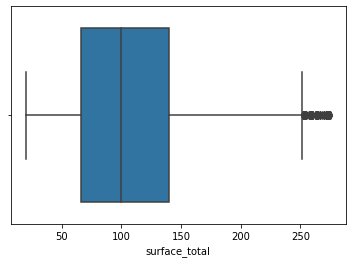

In [45]:
sns.boxplot(data_properati_PH.surface_total)

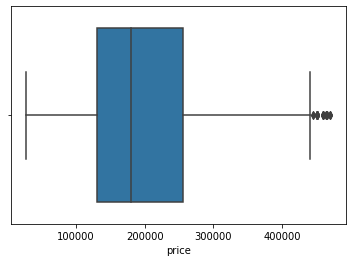

In [46]:
sns.boxplot(data_properati_PH.price)

3.- Escalado de datos para variables surface_covered, surface_total, bathrooms, bedrooms y rooms

In [47]:
valor_medio = data_properati_PH.surface_covered.mean()
std = data_properati_PH.surface_covered.std()
data_properati_PH['surface_covered_resc'] = (data_properati_PH.surface_covered- valor_medio)/std

In [48]:
valor_medio = data_properati_PH.surface_total.mean()
std = data_properati_PH.surface_total.std()
data_properati_PH['surface_total_resc'] = (data_properati_PH.surface_total- valor_medio)/std

In [49]:
valor_medio = data_properati_PH.bathrooms.mean()
std = data_properati_PH.bathrooms.std()
data_properati_PH['bathrooms_resc'] = (data_properati_PH.bathrooms- valor_medio)/std

In [50]:
valor_medio = data_properati_PH.bedrooms.mean()
std = data_properati_PH.bedrooms.std()
data_properati_PH['bedrooms_resc'] = (data_properati_PH.bedrooms- valor_medio)/std

In [51]:
valor_medio = data_properati_PH.rooms.mean()
std = data_properati_PH.rooms.std()
data_properati_PH['rooms_resc'] = (data_properati_PH.rooms- valor_medio)/std

In [52]:
data_properati_PH.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,...,currency,title,description,property_type,operation_type,surface_covered_resc,surface_total_resc,bathrooms_resc,bedrooms_resc,rooms_resc
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,...,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta,-0.740877,-0.736502,0.769145,-1.298632,-1.23603
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,...,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta,-1.069868,-1.221789,-0.708553,-1.298632,-1.23603
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,...,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta,-0.943333,-0.445330,-0.708553,-1.298632,-1.23603
5,2019-10-17,2019-11-01,2019-10-17,-34.593779,-58.441239,Argentina,Capital Federal,Villa Crespo,2.0,1.0,...,USD,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Excelente ph solo 2 unidades, no paga expensas...",PH,Venta,-0.791491,-1.008262,-0.708553,-1.298632,-1.23603
6,2019-10-17,2019-10-31,2019-10-17,-34.600988,-58.433061,Argentina,Capital Federal,Villa Crespo,2.0,1.0,...,USD,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Muy lindo PH, con terraza propia, 96m2! por es...",PH,Venta,-0.437192,-0.736502,-0.708553,-1.298632,-1.23603


6. **Correlaciones:** Estudia la correlación entre las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price`. ¿Cuáles son las mejores variables para predecir el precio?¿Qué diferencias encuentras según cada tipo de propiedad?

# Correlación Departamentos

In [53]:
data_properati_departamento.corr()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,surface_covered_resc,surface_total_resc,bathrooms_resc,rooms_resc,bedrooms_resc
lat,1.000000,-0.160672,-0.013978,-0.023499,0.075943,0.057951,0.041525,0.283661,0.041525,0.057951,0.075943,-0.013978,-0.023499
lon,-0.160672,1.000000,0.086675,0.082506,0.034740,0.071373,0.122642,0.106319,0.122642,0.071373,0.034740,0.086675,0.082506
rooms,-0.013978,0.086675,1.000000,0.924982,0.507035,0.761032,0.801200,0.584444,0.801200,0.761032,0.507035,1.000000,0.924982
bedrooms,-0.023499,0.082506,0.924982,1.000000,0.514808,0.747690,0.789603,0.562180,0.789603,0.747690,0.514808,0.924982,1.000000
bathrooms,0.075943,0.034740,0.507035,0.514808,1.000000,0.620963,0.633074,0.607659,0.633074,0.620963,1.000000,0.507035,0.514808
surface_total,0.057951,0.071373,0.761032,0.747690,0.620963,1.000000,0.942226,0.790025,0.942226,1.000000,0.620963,0.761032,0.747690
surface_covered,0.041525,0.122642,0.801200,0.789603,0.633074,0.942226,1.000000,0.781912,1.000000,0.942226,0.633074,0.801200,0.789603
price,0.283661,0.106319,0.584444,0.562180,0.607659,0.790025,0.781912,1.000000,0.781912,0.790025,0.607659,0.584444,0.562180
surface_covered_resc,0.041525,0.122642,0.801200,0.789603,0.633074,0.942226,1.000000,0.781912,1.000000,0.942226,0.633074,0.801200,0.789603
surface_total_resc,0.057951,0.071373,0.761032,0.747690,0.620963,1.000000,0.942226,0.790025,0.942226,1.000000,0.620963,0.761032,0.747690


Las mejores variables para predecir el precio son surface_total y surface_covered ya que son las que tienen mejor correlación con el precio.

# Correlación Casas

In [54]:
data_properati_casa.corr()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,surface_covered_resc,surface_total_resc,bathrooms_resc,bedrooms_resc,casa_resc
lat,1.000000,-0.100974,0.016322,-0.046339,0.049663,-0.053160,-0.010486,0.382157,-0.010486,-0.053160,0.049663,-0.046339,0.016322
lon,-0.100974,1.000000,0.105554,0.089307,0.056637,0.002345,0.032042,-0.053968,0.032042,0.002345,0.056637,0.089307,0.105554
rooms,0.016322,0.105554,1.000000,0.839840,0.462281,0.478557,0.554475,0.402426,0.554475,0.478557,0.462281,0.839840,1.000000
bedrooms,-0.046339,0.089307,0.839840,1.000000,0.497287,0.455296,0.533292,0.339179,0.533292,0.455296,0.497287,1.000000,0.839840
bathrooms,0.049663,0.056637,0.462281,0.497287,1.000000,0.472271,0.555672,0.494613,0.555672,0.472271,1.000000,0.497287,0.462281
surface_total,-0.053160,0.002345,0.478557,0.455296,0.472271,1.000000,0.850474,0.627384,0.850474,1.000000,0.472271,0.455296,0.478557
surface_covered,-0.010486,0.032042,0.554475,0.533292,0.555672,0.850474,1.000000,0.646312,1.000000,0.850474,0.555672,0.533292,0.554475
price,0.382157,-0.053968,0.402426,0.339179,0.494613,0.627384,0.646312,1.000000,0.646312,0.627384,0.494613,0.339179,0.402426
surface_covered_resc,-0.010486,0.032042,0.554475,0.533292,0.555672,0.850474,1.000000,0.646312,1.000000,0.850474,0.555672,0.533292,0.554475
surface_total_resc,-0.053160,0.002345,0.478557,0.455296,0.472271,1.000000,0.850474,0.627384,0.850474,1.000000,0.472271,0.455296,0.478557


Al igual que en el dataset de departamentos también las mejores variables para predecir el precio es surface_covered y surface_total, aunque tienen una menor correlación con respecto al precio, la variable bathrooms aunque tiene una correlación menor, llega a tener un valor del 0.50

# Correlación PH

In [55]:
data_properati_PH.corr()

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,surface_covered_resc,surface_total_resc,bathrooms_resc,bedrooms_resc,rooms_resc
lat,1.000000,-0.035499,-0.055181,-0.059276,0.050340,-0.081477,-0.039455,0.289967,-0.039455,-0.081477,0.050340,-0.059276,-0.055181
lon,-0.035499,1.000000,0.143958,0.156548,0.054311,-0.041734,0.113798,0.085601,0.113798,-0.041734,0.054311,0.156548,0.143958
rooms,-0.055181,0.143958,1.000000,0.934621,0.483877,0.660788,0.746709,0.559810,0.746709,0.660788,0.483877,0.934621,1.000000
bedrooms,-0.059276,0.156548,0.934621,1.000000,0.470570,0.626505,0.730795,0.551927,0.730795,0.626505,0.470570,1.000000,0.934621
bathrooms,0.050340,0.054311,0.483877,0.470570,1.000000,0.482376,0.568721,0.538276,0.568721,0.482376,1.000000,0.470570,0.483877
surface_total,-0.081477,-0.041734,0.660788,0.626505,0.482376,1.000000,0.836552,0.650841,0.836552,1.000000,0.482376,0.626505,0.660788
surface_covered,-0.039455,0.113798,0.746709,0.730795,0.568721,0.836552,1.000000,0.709563,1.000000,0.836552,0.568721,0.730795,0.746709
price,0.289967,0.085601,0.559810,0.551927,0.538276,0.650841,0.709563,1.000000,0.709563,0.650841,0.538276,0.551927,0.559810
surface_covered_resc,-0.039455,0.113798,0.746709,0.730795,0.568721,0.836552,1.000000,0.709563,1.000000,0.836552,0.568721,0.730795,0.746709
surface_total_resc,-0.081477,-0.041734,0.660788,0.626505,0.482376,1.000000,0.836552,0.650841,0.836552,1.000000,0.482376,0.626505,0.660788


Las variables con mayor correlación con respecto al precio es igual surface_total y surface_covered, en este dataset las otras tres variables tienen una correlación muy parecida entre sí, tanto rooms, bedrooms y bathrooms tienen una correlación aproximada de 0.55 con respecto al precio.

### 2.1 Desafío

Una pregunta que se podría responder con el dataset podría ser la siguiente: ¿Cuál es la región más cara para vivir en Argentina? Esta pregunta se puede responder, pero al igual que el ejemplo dado, esta respuesta puede estar sesgada debido a que tal vez las propiedades más caras no son publicadas por este medio.

### 3. Machine Learning

En esta sección, debes entrenar dos modelos de Machine Learning - uno de vecinos más cercanos y otro de árboles de decisión -  para predecir el precio de las propiedades tipo `Departamento` en la Ciudad Autónoma de Buenos Aires (`Capital Federal`). Para ello, no debes olvidarte de:

* Elegir una métrica apropiada para evaluar los resultados de los modelos.
* Seleccionar las variables predictoras (`X`) y la variable a predecir (`y`). 
* Realizar un Train/Test split de los datos.
* Generar un modelo *benchmark* y evaluarlo.
* Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.
* Evaluar los modelos obtenidos. Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realiza gráficos de valores reales vs. valores predichos.
* Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.
* Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué? 
* Ser **crítico/a** con la metodología utilizada. Por ejemplo, responde las siguientes preguntas: ¿Qué información no estás usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?

Estos lineamientos corresponden al **mínimo entregable** de esta sección.


**Importante:** para asegurarnos que trabajes con un dataset apropiados, debes volver a cargar los datos y realizar el siguiente filtrado:

1. Selecciona aquellas propiedades en Capital Federal y cuyo tipo de propiedad es Departamento, PH o Casa.
1. Selecciona aquellas propiedades cuya superficie total es menor a 1000 m2 y mayor a 15 m2.
1. Selecciona aquellas propiedades cuya precio es menor 4000000 dólares.
1. Selecciona las columnas `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered` y `price`.
1. Descarta aquellas instacias con valores faltantes.

**Checkpoint:** deberías obtener un dataset con 81021 instacias y 6 columnas.

Entre los modelo entrenados eligiría el de ..

In [56]:
dp_filtrado = data_properati_final[(data_properati_final.surface_total <= 1000) & (data_properati_final.surface_total >= 15) & (data_properati_final.price <= 4000000 )]
dp_filtrado_1 = dp_filtrado.drop(columns = ['start_date', 'end_date','created_on','lat','lon','l1','l2','l3','currency','title','description','property_type','operation_type'])
#dp_filtrado_1.shape
# dp_filtrado_1.isna().sum()
dp_f = dp_filtrado_1[~np.isnan(dp_filtrado_1.surface_covered) & (dp_filtrado_1.bathrooms)]
dp_f.shape

(81019, 6)

# Parte B Proyecto 2

# Regresión con atributos polinómicos

In [57]:
from sklearn.preprocessing import PolynomialFeatures

In [58]:
from sklearn.model_selection import train_test_split
X = data_properati_departamento[['surface_total_resc','surface_covered_resc','rooms_resc','bathrooms_resc','bedrooms_resc']]
y = data_properati_departamento.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [59]:
poly = PolynomialFeatures()
X_train_new = poly.fit_transform(X_train)
X_test_new = poly.fit_transform(X_test)
print(X_train_new.shape, X_test_new.shape)

(43246, 21) (18535, 21)


In [60]:
from sklearn.linear_model import LinearRegression
reg_2 = LinearRegression()
reg_2.fit(X_train_new,y_train)
y_train_pred_2 = reg_2.predict(X_train_new)
y_test_pred_2 = reg_2.predict(X_test_new)

In [61]:
from sklearn.model_selection import cross_val_score
reg_scores = cross_val_score(reg_2, X, y, cv=5)
print("Accuracy para Modelo: %0.2f (+/- %0.2f)" % (reg_scores.mean(), reg_scores.std() * 2))

Accuracy para Modelo: 0.66 (+/- 0.02)


Raíz del error cuadrático medio en Train: 52795.10337224555
Raíz del error cuadrático medio en Test: 53125.28353170076


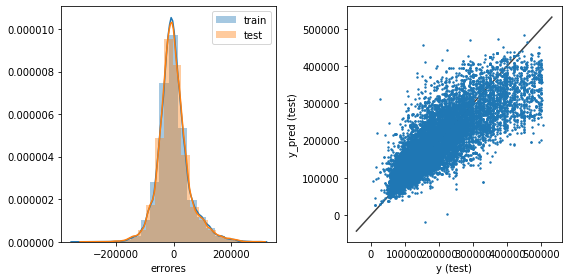

In [62]:
from sklearn.metrics import mean_squared_error

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred_2))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred_2))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

plt.figure(figsize = (8,4))

plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred_2, bins = 20, label = 'train')
sns.distplot(y_test - y_test_pred_2, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()


ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred_2, s =2)

lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]

ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')

plt.tight_layout()
plt.show()

# Regularización

In [63]:
from sklearn.linear_model import Ridge, Lasso

reg_ridge = Ridge(alpha= 0.001)
reg_ridge.fit(X_train_new,y_train)

print(f'Pendientes: {reg_ridge.coef_}')
print(f'Ordenada: {reg_ridge.intercept_}')

Pendientes: [     0.          59319.40870181  28741.72946989  -3386.51973217
  22221.3227716  -15492.21675444 -17510.01990201  16271.22505464
  14289.60697187   2636.49256212   1776.56291726  -5512.72913886
  -8968.48373327  -1578.10343618  -7664.22549944    270.00313864
  -1519.4089154    -778.01164849  -1534.68784257  -1764.69278901
    666.86747953]
Ordenada: 196975.23144586105


In [64]:
from sklearn.model_selection import cross_val_score
ridge_scores = cross_val_score(reg_ridge, X_test_new, y_test, cv=5)
print("Accuracy para Modelo: %0.2f (+/- %0.2f)" % (ridge_scores.mean(), ridge_scores.std() * 2))

Accuracy para Modelo: 0.68 (+/- 0.01)


# Optimización de parámetros

In [65]:
# Grilla para Grid Search
param_grid = {'alpha':np.arange(.0001, 1),
              'fit_intercept': ['True','False'],
              'solver': ['auto', 'svd','cholesky','lsqr','sparse_cg','sag','saga']}

In [66]:
reg_ridge_2 = Ridge()

In [67]:
from sklearn.model_selection import GridSearchCV
# ESTRATEGIA 1: Grid Search
model = GridSearchCV(reg_ridge_2, param_grid=param_grid, cv=5)

# Entrenamos: KNN con la grilla definida arriba y CV con tamaño de Fold=5
model.fit(X_train_new, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([0.0001]),
                         'fit_intercept': ['True', 'False'],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag', 'saga']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [68]:
print("Mejores parametros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')

Mejores parametros: {'alpha': 0.0001, 'fit_intercept': 'True', 'solver': 'sparse_cg'}
Mejor Score: 0.6806835253805772



# Modelo Árboles de Decisión (Proyecto 1, Comparación)

In [69]:
from sklearn.tree import DecisionTreeRegressor
from math import sqrt
rmse_val = []
for K in range(50):
    K = K+1
    tree_regressor = DecisionTreeRegressor(max_depth= K , random_state=42)

    tree_regressor.fit(X_train, y_train)  #fit the model
    pred= tree_regressor.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 69063.83676579961
RMSE value for k=  2 is: 60026.97824894035
RMSE value for k=  3 is: 56917.088626749035
RMSE value for k=  4 is: 54982.20469953239
RMSE value for k=  5 is: 53898.911570689015
RMSE value for k=  6 is: 52722.218928475406
RMSE value for k=  7 is: 51782.19796843859
RMSE value for k=  8 is: 51094.048759402656
RMSE value for k=  9 is: 50243.28445014599
RMSE value for k=  10 is: 49503.27240963788
RMSE value for k=  11 is: 48779.633770804336
RMSE value for k=  12 is: 48331.5342231068
RMSE value for k=  13 is: 47830.2146539261
RMSE value for k=  14 is: 47302.25668657991
RMSE value for k=  15 is: 47142.952398911395
RMSE value for k=  16 is: 47366.238931157575
RMSE value for k=  17 is: 47449.6431234966
RMSE value for k=  18 is: 47649.92647241304
RMSE value for k=  19 is: 47873.77590362852
RMSE value for k=  20 is: 47647.07897526357
RMSE value for k=  21 is: 47654.62139788165
RMSE value for k=  22 is: 47631.828633648154
RMSE value for k=  23 is: 47477.6751

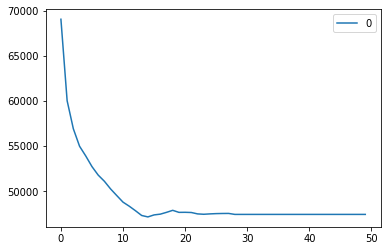

In [70]:
curve = pd.DataFrame(rmse_val)
curve.plot()

Se determina que con una profundidad de 15 es donde existe el menor error

In [73]:
X = data_properati_departamento[['surface_total_resc','surface_covered_resc','rooms_resc','bathrooms_resc','bedrooms_resc']]
y = data_properati_departamento.price
from sklearn.tree import DecisionTreeRegressor
tree_regressor = DecisionTreeRegressor(max_depth=30, random_state=42)
tree_regressor.fit(X,y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=30,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [74]:
tree_regressor.score(X,y)

0.8655541654239732

Al usar un árbol de decisión con el nuevo data set y las nuevas variables en la variable X aumentó su score de 81% a 86%, y tamién éste modelo obtuvo un mejor puntaje que los modelos avanzados (Regresión con atributos polinómicos y Regularización), por lo tanto yo utilizaría el modelo de árboles de decisión.
Se utilizaron estos parámetros ya que son los que tienen una mayor correlación entre el precio y la misma variable.

# Parte C Proyecto 2

Se puede observar que las variables que son relevantes para los modelos es surface_total, surface_covered y rooms ya que son las que están mas correlacionadas con el precio de la propiedad y en el modelo del proyecto anterior nos ayudo a hacer una estimación del precio. 
Según lo que se ve, las variables que no son tan relevantes es rooms y bathrooms las cuales se utilzaron y no mejoraron el modelo que se tenía anteriormente.


En el modelo de árbol de decisión se puede observar que acierta en un 86% en donde tiene un menor error cuando existe una profundidad de 15 en donde existe un error de  47142.9. Se observa un mayor error es a una profundidad de 1 en donde existe un error 69063.83, obteniendo un score de 44%, y lo más seguro es que va a tener problemas de under fitting.

Sobre los resultados creo que es bueno el resultado utilizando el modelo de árbol de decisión después de implementar los cambios en el preprocesamiento de datos ya que se obtiene un mayor score con los datos transformados en comparación con el resultado obtenido en el proyecto 1. En el caso de los modelos avanzados se puede ver que los resultados no fueron muy buenos y que tal vez esos modelos o la transformación de los datos que se realizó no fue la más adecuada en este caso en particular.
Sobre la metodología utilizada creo que fue adecuada ya que se hizo correctamente el preprocesamiento de los datos, la aplicación del modelo y la optimización de hiperparámetros. Mejoraría el preprocesamiento, creo que existen variables a las que se les pueden sacar provecho y que nos pueden ayudar a mejorar la predicción, y probaría con distintos modelos para poder comparar su rendimiento. 